In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

#Repere lors de la separation apres le preprocessing
test['source']= 'test'  
train['source']= 'train'


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,source
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test


In [5]:
train.shape

(1460, 82)

In [6]:
test.shape

(1459, 81)

# Preprocessing

#### **1. Nettoyages et imputations des valeurs manquantes**

**A. Nettoyage**

 **a. Visualisation**

In [7]:
#TRAIN

#pd.set_option('display.max_row',82)
#print(train.isna().sum())

In [8]:
#TEST

#pd.set_option('display.max_row',83)
#print(test.isna().sum())

**b. Suppression des colonnes avec beaucoup de valeurs manquantes**

In [9]:
train.drop(['Fence','MasVnrType','Alley','MiscFeature','PoolQC'],axis=1,inplace=True)
test.drop(['Fence','MasVnrType','Alley','MiscFeature','PoolQC'],axis=1,inplace=True)

**c. Suppression des colonnes tres correlles par rapport a d'autres pour eviter les redondances(resultat de L'EDA)**

In [11]:
train.drop(['TotalBsmtSF','GarageCars','TotRmsAbvGrd','LowQualFinSF','FireplaceQu'], axis=1,inplace=True)
test.drop(['TotalBsmtSF','GarageCars','TotRmsAbvGrd','LowQualFinSF','FireplaceQu'], axis=1,inplace=True)

**d. Suppression des lignes appartenant au colonnes  avec une ou 2 valeurs manquantes**

In [12]:
train = train.dropna(subset=['MasVnrArea','Electrical'])
test = test.dropna(subset=['Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Electrical','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageArea','SaleType'])

***Verification**

In [13]:
pd.set_option('display.max_row',83)
print("TRAIN\n")
print(train.isna().sum(),"\n")
print("TEST\n")
print(train.isna().sum())

TRAIN

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      257
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
Bedroo

**B.imputations**

In [14]:
#Traitement des valeurs manquantes pour les variable categorielles
colonne_categorielles = train.select_dtypes(include='object').columns

for col in colonne_categorielles:
    #train.loc[:, col] = train[col].fillna(train[col].mode()[0])
    train[col] = train[col].fillna(train[col].mode()[0])

#Traitement des valeurs manquantes pour les variable numeriques 
colonne_numeriques = train.select_dtypes(include=['int64', 'float64']).columns

for col in colonne_numeriques:
    #train.loc[:, col] = train[col].fillna(train[col].median())
    train[col] = train[col].fillna(train[col].median())

#TEST
colonne_categoriellest = test.select_dtypes(include='object').columns

for col in colonne_categoriellest:
    #test.loc[:, col] = test[col].fillna(test[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])
    
#Traitement des valeurs manquantes pour les variable numeriques 
colonne_numeriquest = test.select_dtypes(include=['int64', 'float64']).columns

for col in colonne_numeriquest:
    #test.loc[:, col] = test[col].fillna(test[col].median())
    test[col] = test[col].fillna(test[col].median())

In [15]:
train.shape

(1451, 72)

In [16]:
test.shape

(1449, 71)

#### 2. encodage + normalisation

In [17]:
# Concatener le  train and test pour le processing
cible=train['SalePrice']
data = pd.concat([train.drop("SalePrice", axis=1), test], sort=False).reset_index(drop=True)

In [18]:
data_encoded = pd.get_dummies(data,drop_first=True)
data_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,source_train
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,True,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,True,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,True,False,True
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,False,False,False,False,False,True
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,True,False,True


In [19]:
cible.shape

(1451,)

In [20]:
print('SalePrice' in data_encoded.columns)  # True ou False

False


***Redecoupage**

In [21]:
X = data_encoded[data['source'] == 'train']
X_test = data_encoded[data['source'] == 'test']
Y = cible
X=X.drop('source_train',axis=1)
X_test =X_test.drop('source_train',axis=1)
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,False,True,False,False,False,True,False


# MODELISATION

***separation**

In [22]:
X_train,X_valid,Y_train,Y_valid = train_test_split(X,Y,test_size = 0.2,random_state=0)

***Normalisation**

In [23]:
from sklearn.preprocessing import StandardScaler
# 1. Fit le scaler/encodeur sur le train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# 2. Transform seulement le valid
X_valid = scaler.transform(X_valid)

***Model et Evaluation**

In [24]:
#liste des modeles
models={"Regression Lineaire" : LinearRegression(),
        "Random Forest ": RandomForestRegressor(random_state=0),
        "Gradient Boosting ": GradientBoostingRegressor(random_state=0)}
#entrainement de chaque modele
for name,model in models.items():
    model.fit(X_train,Y_train)
    preds = model.predict(X_valid)
    rmse = mean_squared_error(Y_valid,preds)
    r2 = r2_score(Y_valid,preds)
    print(f"{name} - RMSE :{rmse:.2f} | R^2 : {r2 : .4f}")

Regression Lineaire - RMSE :19969348236931597215448392794112.00 | R^2 : -3802026007531200970752.0000
Random Forest  - RMSE :596672860.58 | R^2 :  0.8864
Gradient Boosting  - RMSE :581780943.16 | R^2 :  0.8892


***Visualisation Gradient Boosting**

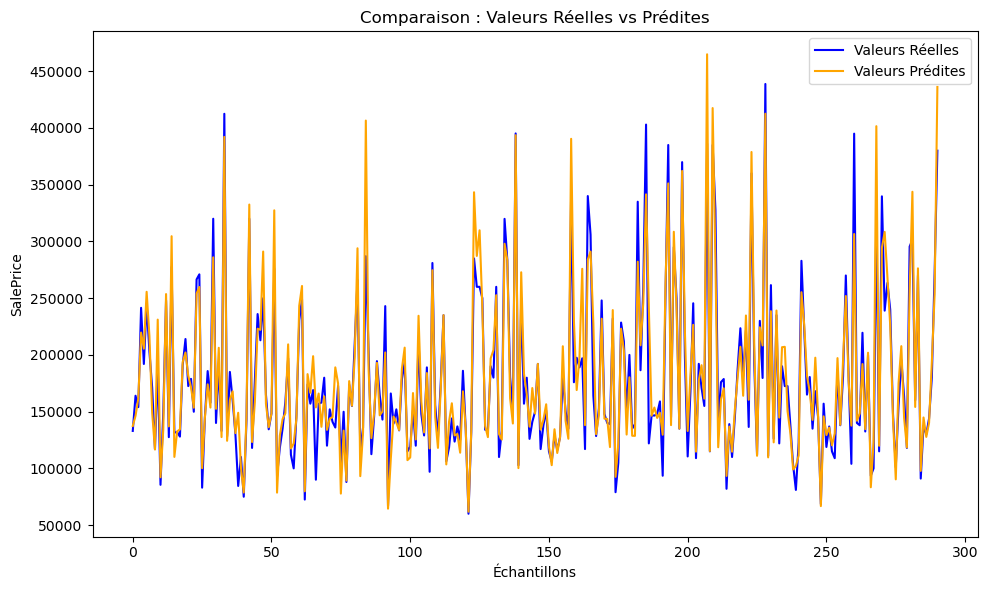

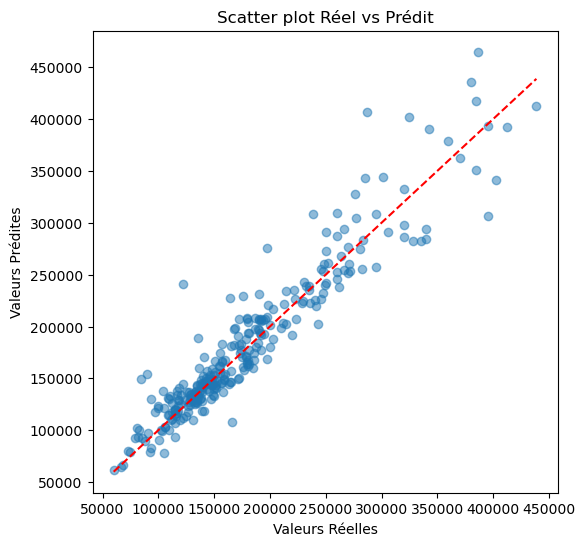

In [25]:
plt.figure(figsize=(10,6))
plt.plot(Y_valid.values, label="Valeurs Réelles", color='blue')
plt.plot(preds, label="Valeurs Prédites", color='orange')
plt.legend()
plt.title("Comparaison : Valeurs Réelles vs Prédites")
plt.xlabel("Échantillons")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(Y_valid, preds, alpha=0.5)
plt.plot([Y_valid.min(), Y_valid.max()], [Y_valid.min(), Y_valid.max()], 'r--')  # ligne parfaite
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Scatter plot Réel vs Prédit")
plt.show()

****Validation Croisee***

In [26]:
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
print("Scores CV:", scores)
print("Moyenne CV:", scores.mean())

Scores CV: [0.90936467 0.90920954 0.81032954 0.86989567 0.86673396]
Moyenne CV: 0.8731066762458436


# OPTIMISATION

In [27]:
from sklearn.model_selection import GridSearchCV, KFold

In [28]:
#parametres du Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05,0.1]
}
#Cross Validation
cv = KFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(estimator=models["Gradient Boosting "], param_grid= param_grid, cv=cv, scoring='r2',n_jobs=-1, verbose=2)  
grid_search.fit(X_train,Y_train)
y_pred = grid_search.predict(X_valid)

print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

test_score = grid_search.score(X_train,Y_train)  
print("Test set score: {:.2f}".format(test_score))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.86
Test set score: 1.00


In [ ]:
predictions = models["Gradient Boosting "].predict(X_test)
output = pd.DataFrame({'Id': X_test['Id'],
                       'SalePrice': predictions})

print(output.head())

output.to_csv('submission.csv', index=False)